In [1]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import warnings
warnings.filterwarnings('ignore')

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.path as mpath

import xgcm

In [2]:
from os.path import join,expanduser
user_home_dir = expanduser('~')

sys.path.append(join(user_home_dir,'ECCOv4-py'))

import ecco_v4_py as ecco

In [3]:
ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')

In [4]:
#download the ECCO grid file

from ecco_download import *

ecco_podaac_download(ShortName="ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",\
                    StartDate="2000-01-09",EndDate="2000-01-14",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

created download directory /home/m267zhou/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4
{'ShortName': 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4', 'temporal': '2000-01-09,2000-01-14'}

Total number of matching granules: 1

GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|########################| 1/1 [00:00<00:00, 14513.16it/s]

total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s


In [5]:
# download file (granule) containing 2000 velocities,
# to default path ~/Downloads/ECCO_V4r4_PODAAC/
vel_monthly_shortname = "ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4"
ecco_podaac_download(ShortName=vel_monthly_shortname,\
                    StartDate="2000-01-02",EndDate="2000-12-31",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

vol_monthly_shortname = "ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4"
ecco_podaac_download(ShortName=vol_monthly_shortname,\
                    StartDate="2000-01-02",EndDate="2000-12-31",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

created download directory /home/m267zhou/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4
{'ShortName': 'ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2000-01-02,2000-12-31'}

Total number of matching granules: 12

OCEAN_VELOCITY_mon_mean_2000-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2000-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2000-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2000-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2000-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2000-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2000-08_ECCO_V4r4_native_llc0090.nc already exist

In [6]:
## Load the model grid
ecco_grid = xr.open_dataset(glob.glob(join(ECCO_dir,'*GEOMETRY*','*.nc'))[0])

In [7]:
## Load vector fields
ecco_vars1 = xr.open_mfdataset(join(ECCO_dir,'*OCEAN*VEL*MONTHLY*','*_2000-*.nc'))
ecco_vars2 = xr.open_mfdataset(join(ECCO_dir,'*OCEAN*VOLUME*MONTHLY*','*_2000-*.nc'))


ecco_ds = []

## Merge the ecco_grid with the ecco_vars to make the ecco_ds
ecco_ds = xr.merge((ecco_grid , ecco_vars1, ecco_vars2)).load()

<Figure size 640x480 with 0 Axes>

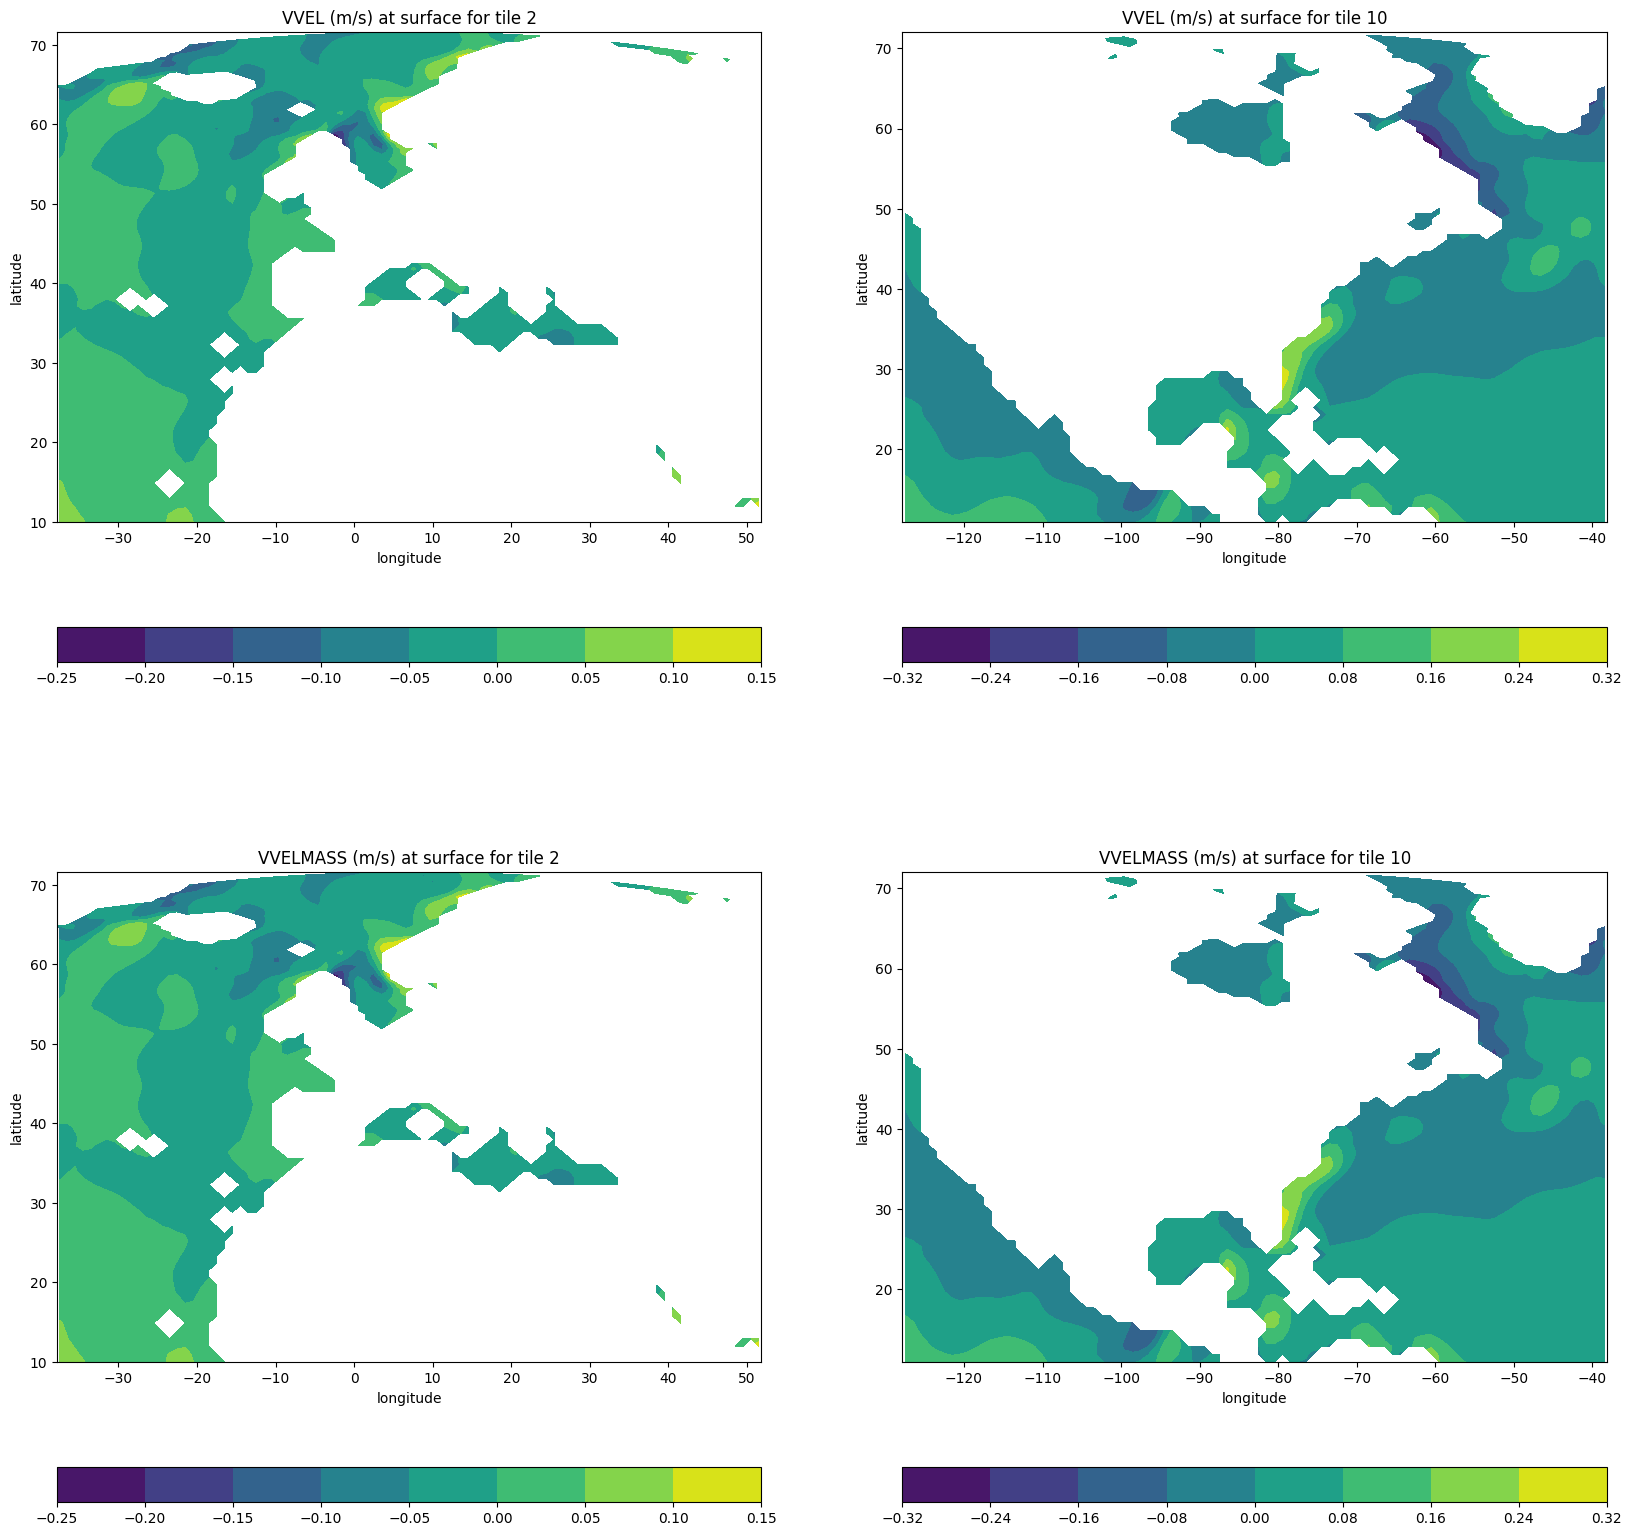

In [8]:
#plots after rotation

#do rotation first at some k (surface as default)
xfld = ecco_ds.UVEL.isel(k=0, time=0)
yfld = ecco_ds.VVEL.isel(k=0, time=0)
# Compute the zonal and meridional vector components of UVEL and VVEL
VEL_E, VEL_N  = ecco.vector_calc.UEVNfromUXVY(xfld, yfld, ecco_ds)  


xfldm = ecco_ds.UVELMASS.isel(k=0, time=0)
yfldm = ecco_ds.VVELMASS.isel(k=0, time=0)
# Compute the zonal and meridional vector components of UVEL and VVEL
VEL_Em, VEL_Nm  = ecco.vector_calc.UEVNfromUXVY(xfldm, yfldm, ecco_ds)  

XC2 = ecco_grid.XC.isel(tile=2)
YG2 = ecco_grid.YG.isel(tile=2)
XC10 = ecco_grid.XC.isel(tile=10)
YG10 = ecco_grid.YG.isel(tile=10)

plt.figure()
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))


f1=ax[0,0].contourf(XC2, YG2, VEL_N.isel(tile=2))
ax[0,0].set_title('VVEL (m/s) at surface for tile 2')
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')

f2=ax[0,1].contourf(XC10, YG10, VEL_N.isel(tile=10))
ax[0,1].set_title('VVEL (m/s) at surface for tile 10')
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')

f3=ax[1,0].contourf(XC2, YG2, VEL_Nm.isel(tile=2))
ax[1,0].set_title('VVELMASS (m/s) at surface for tile 2')
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')

f4=ax[1,1].contourf(XC10, YG10, VEL_Nm.isel(tile=10))
ax[1,1].set_title('VVELMASS (m/s) at surface for tile 10')
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')

fig.colorbar(f1, ax=ax[0, 0], shrink=1, location='bottom')
fig.colorbar(f2, ax=ax[0, 1], shrink=1, location='bottom')
fig.colorbar(f3, ax=ax[1, 0], shrink=1, location='bottom')
fig.colorbar(f4, ax=ax[1, 1], shrink=1, location='bottom')